In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')

def execute_and_plot(circuit, shots):
    result = execute(circuit, backend = simulator, shots = shots).result()
    counts = result.get_counts()
    return plot_histogram(counts)

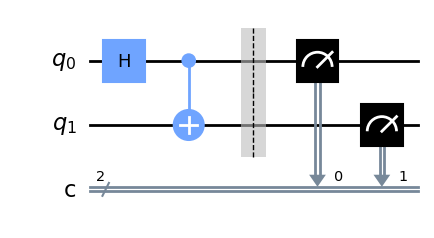

In [2]:
circuit = QuantumCircuit(2, 2)

circuit.h(0)
circuit.cnot(0,1)

circuit.barrier()
circuit.measure(0,0)
circuit.measure(1,1)

circuit.draw(output='mpl')

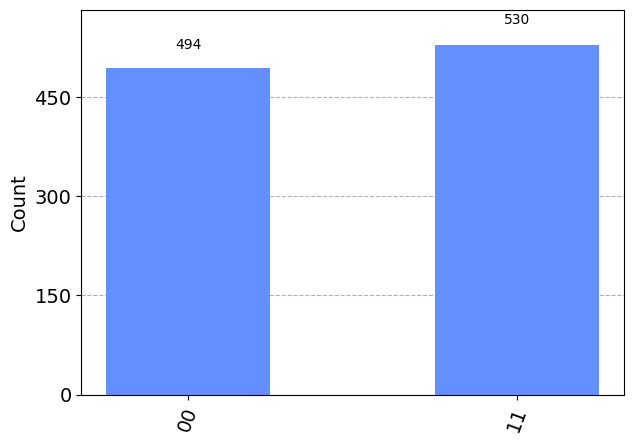

In [3]:
execute_and_plot(circuit, 1024)

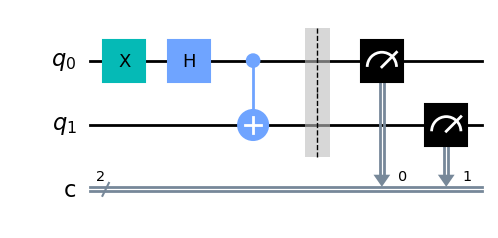

In [13]:
circuit = QuantumCircuit(2, 2)

circuit.x(0)

circuit.h(0)
circuit.cnot(0,1)

circuit.barrier()
circuit.measure(0,0)
circuit.measure(1,1)

circuit.draw(output='mpl')

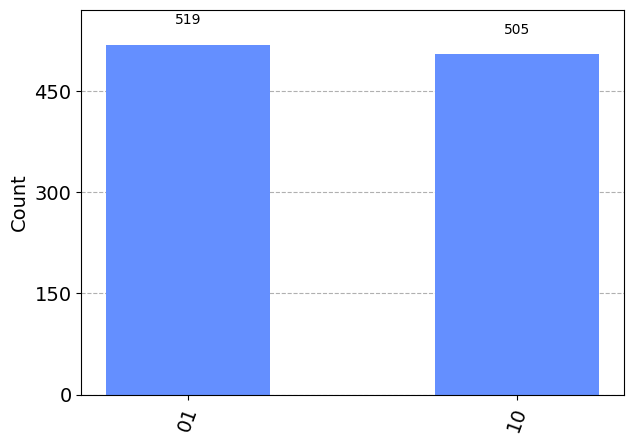

In [11]:
execute_and_plot(circuit, 1024)

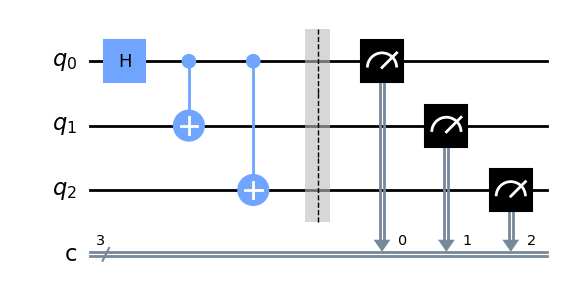

In [4]:
circuit = QuantumCircuit(3,3)

circuit.h(0)
circuit.cnot(0,1)
circuit.cnot(0,2)

circuit.barrier()

circuit.measure(0,0)
circuit.measure(1,1)
circuit.measure(2,2)

circuit.draw(output='mpl')

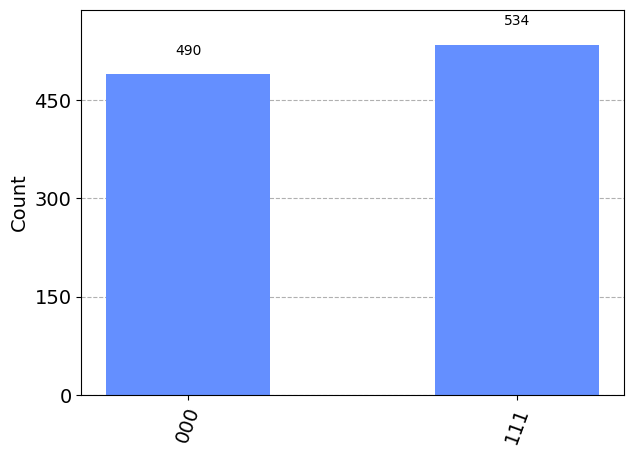

In [5]:
execute_and_plot(circuit, 1024)

In [14]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor

backend = simulator

q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

def firstBellState():
    circuit = QuantumCircuit(q,c)

    circuit.h(q[0]) # Hadamard gate 
    circuit.cx(q[0],q[1]) # CNOT gate
    circuit.measure(q,c) # Qubit Measurment

    print(circuit)

    job = execute(circuit, backend, shots=8192)
    
    job_monitor(job)
    counts = job.result().get_counts()

    print(counts)

def secondBellState():
    circuit = QuantumCircuit(q,c)

    circuit.x(q[0]) # Pauli-X gate 
    circuit.h(q[0]) # Hadamard gate 
    circuit.cx(q[0],q[1]) # CNOT gate
    circuit.measure(q,c) # Qubit Measurment

    print(circuit)

    job = execute(circuit, backend, shots=8192)
    
    job_monitor(job)
    counts = job.result().get_counts()

    print(counts)

def thirdBellState():
    circuit = QuantumCircuit(q,c)

    circuit.x(q[1]) # Pauli-X gate 
    circuit.h(q[0]) # Hadamard gate 
    circuit.cx(q[0],q[1]) # CNOT gate
    circuit.measure(q,c) # Qubit Measurment

    print(circuit)

    job = execute(circuit, backend, shots=8192)
    
    job_monitor(job)
    counts = job.result().get_counts()

    print(counts)

def fourthBellState():
    circuit = QuantumCircuit(q,c)

    circuit.x(q[1]) # Pauli-X gate 
    circuit.h(q[0]) # Hadamard gate
    circuit.z(q[0]) # Pauli-Z gate
    circuit.z(q[1]) # Pauli-Z  gate 
    circuit.cx(q[0],q[1]) # CNOT gate
    circuit.measure(q,c) # Qubit Measurment

    print(circuit)

    job = execute(circuit, backend, shots=8192)
    
    job_monitor(job)
    counts = job.result().get_counts()

    print(counts)

print("Creating first Bell State:\n")
firstBellState()
print("\nCreating second Bell State:\n")
secondBellState()
print("\nCreating third Bell State:\n")
thirdBellState()
print("\nCreating fourth Bell State:\n")
fourthBellState()

Creating first Bell State:

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Job Status: job has successfully run
{'00': 4098, '11': 4094}

Creating second Bell State:

     ┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     └───┘└───┘┌─┴─┐└╥┘┌─┐
q_1: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 
Job Status: job has successfully run
{'11': 4113, '00': 4079}

Creating third Bell State:

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Job Status: job has successfully run
{'10': 4065, '01': 4127}

Creating fourth Bell State:

     ┌───┐┌───┐     ┌─┐   
q_0: ┤ H ├┤ Z ├──■──┤M├───
     ├───┤├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ Z ├┤ X ├─╫─┤M├
     └───┘└───┘└───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 
Job Status: